<a href="https://colab.research.google.com/github/Sandeep0076/Data-Science/blob/main/Stainless_steel_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <Center>**Aim: To predict the prices of stainless-steel (Column: StainlessSteelPrice)**

<img src='https://mmsteelclub.com/wp-content/uploads/2020/02/Stainless-Steel.jpg'  width="1600" height="200"> />

In [2]:
#@title 
from IPython.display import Image
from google.colab import drive
drive.mount("/content/Gdrive");


Mounted at /content/Gdrive


## <Center>**Task explanation**


Predict prices of Stainless-steel for the time period 3 months and 6 months
Tasks:

1. Conduct exploratory data analysis and report the insights

2. Forecast the prices of stainless-steel for the given time period(s) 
3. Provide insights on how your model made the prediction
4. Use the following evaluation criteria for model selection: Mean Absolute Percentage Error (MAPE)


<Br>

o Directional Symmetry

- BCI: Business Confidence Index:  business confidence indicates expectations of firms, based upon surveys on production, orders, and finished goods in the sector. 
- CLI: Composite Leading Indicator :Its is geared toward predicting the direction of the overall economy over the next few quarters.
- PMI: Purchasing Managers Index : The Purchasing Managers' Index (PMI) is an index of the prevailing direction of economic trends in the manufacturing and service sectors. It consists of a diffusion index that summarizes whether market conditions, as viewed by purchasing managers, are expanding, staying the same, or contracting. 

## <Center> **Project Outline**



1.   [Imports](#import_id)

  *   Python libraries
  *   Dataset

2.   [Exploratory data analysis](#eda_id)
  *   [Check data types of features](#eda_id)
  *   [Check null values](#eda_id)
  *   [Check statistical data like percentile, mean and std](#desc_id)
  *   [Feature extraction](#new_features_id)
  *   [Univariate analysis](#univariate_id)
  *   [Bivariate analysis](#bivariate_id) 
  *   [Time Series component analysis](#time_id) 
  *   [Feature selection](#select_id)
      *   Drop Features using Pearson Correlation
      *   Decision trees for feature selection
  *   [Outlier removal](#outlier_id) 
3.   [Split data into test and train](#split_id) 
4.   [Feature Scaling](#scale_id) 
5.   [Forecasting Models](#models_id)

    *   [Simple Moving Average model](#ma_id)
    *   [Holt Winters' additive method ](#holt_id)
    *   [Auto Regressive method](#ar_id)
    *   [Seasonal auto regressive integrated moving average](#sarima_id)
    *   [LSTM Recursive Multi-step Forecast Model](#lstm_id)
    *   [Prophet-multivariatel](#prophet_id)


    


    
    
5.   [Conlusion](#conclusion_id) 






In [ ]:
#@title Import python libraries
!pip install pmdarima
!pip install -U keras-tuner

import pandas as pd
import numpy as np
import datetime

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import plotly.express as px 
from pylab import rcParams

#Statistical methods
from pmdarima import auto_arima
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from scipy.stats import boxcox
import math

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics, cross_validation


#Keras
from tensorflow import keras
import tensorflow as tf
from kerastuner.tuners import RandomSearch

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
#@title Import dataset
import pandas as pd
df = pd.read_csv('/content/Gdrive/MyDrive/Data science/Stainless-Steel-Prices-Forecasty-Assignment.csv')
df.head()

,Date,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
0,7/1/2013,0.827352,20575,10568,127.191304,82.222360,227.022942,13750.31522,1837.619565,-0.4,104.545217,1062,98.80018,99.64265,100.1044,101.1423,99.43615,100.6230,50.9,6906.64
1,8/1/2013,0.760221,20609,10821,137.055000,82.221429,232.234194,14308.26190,1896.392857,0.5,106.546364,1132,99.04874,99.91766,100.3962,101.1938,99.64082,100.6545,55.4,7186.25
2,9/1/2013,0.784715,20761,10774,134.185714,83.295918,234.335594,13801.39286,1846.880952,0.1,106.313809,2003,99.27196,100.18490,100.5363,101.2066,99.84383,100.6646,55.7,7159.27
3,10/1/2013,0.769293,20735,11291,132.572727,85.443634,229.393932,14117.65217,1884.836957,-0.1,100.500435,1504,99.40488,100.36330,100.5771,101.1835,100.02300,100.6666,56.2,7203.02
4,11/1/2013,0.750242,20854,11559,136.323810,88.363265,225.437049,13684.01190,1866.416667,2.1,93.812381,1821,99.36221,100.49830,100.5459,101.1283,100.17150,100.6744,56.4,7070.65


## <Center> <a name="eda_id">**Exploratory data analysis**</a>


### Check data types of features and null values

In [5]:
# Check data types of features and null values
df.info()
#df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      84 non-null     object 
 1   StainlessSteelPrice       84 non-null     float64
 2   Steel_Inventory_M_USD     84 non-null     int64  
 3   Steel_Orders_M_USD        84 non-null     int64  
 4   IronOre_Global_USD        84 non-null     float64
 5   CoalAustralia_Global_USD  84 non-null     float64
 6   Energy_Index              84 non-null     float64
 7   Nickel_Global_USD         84 non-null     float64
 8   Zinc_Global_USD           84 non-null     float64
 9   Freight_Transport_Index   84 non-null     float64
 10  WTI_Crude_Global_USD      84 non-null     float64
 11  Baltic_Dry_Index          84 non-null     int64  
 12  BCI_China                 84 non-null     float64
 13  BCI_Europe                84 non-null     float64
 14  BCI_US      

Dataset consists of 19 Columns and 84 rows with **no null values**. Date column has object datatype, which is needed to be converted for better processing  of flow of information.
<a name="desc_id"></a>

In [6]:
# Converting column to datetime pandas
df['Date'] = pd.to_datetime(df['Date'], yearfirst=True, infer_datetime_format=True)
df.sort_values(by='Date', ascending=True, inplace=True)
df_date = df.copy()

In [7]:
#@title Calculating some statistical data like percentile, mean and std
# Calculating some statistical data like percentile, mean and std
df.describe()

,StainlessSteelPrice,Steel_Inventory_M_USD,Steel_Orders_M_USD,IronOre_Global_USD,CoalAustralia_Global_USD,Energy_Index,Nickel_Global_USD,Zinc_Global_USD,Freight_Transport_Index,WTI_Crude_Global_USD,Baltic_Dry_Index,BCI_China,BCI_Europe,BCI_US,CLI_China,CLI_Europe,CLI_US,PMI_US_Manufacturing,Copper_Global_USD
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,0.810715,20070.559524,9831.595238,79.962940,81.844151,143.408951,12712.275477,2358.786301,0.122619,61.017507,1067.785714,98.710869,100.569427,100.175521,99.563679,100.023602,99.814380,54.026190,6037.075714
std,0.143444,1764.033210,1240.333905,23.874776,19.443360,47.136073,2694.729168,470.463900,1.230080,21.407539,443.697935,0.848983,1.123901,0.876723,2.027340,1.567463,1.367807,4.097578,783.645475
min,0.499859,16688.000000,7650.000000,40.882609,53.428929,52.771306,8298.500000,1520.362500,-7.100000,16.807273,317.000000,94.501530,95.996640,98.102130,85.383290,90.343960,92.280250,41.500000,4471.790000
25%,0.743778,18980.000000,8904.000000,61.484190,67.111352,111.607197,10578.975000,2021.262099,-0.425000,47.738636,699.500000,98.271312,100.427200,99.535878,99.225065,99.696710,99.278723,51.275000,5645.152500
50%,0.812157,20190.000000,9947.000000,74.280682,78.677679,131.088857,12721.351135,2287.054725,0.250000,54.912545,1058.500000,98.675055,100.562400,100.312350,99.854750,100.294100,100.030800,54.250000,6024.555000
75%,0.893690,21458.500000,11062.500000,92.409524,96.985695,163.923895,14105.350543,2658.296875,0.725000,68.464674,1354.500000,99.364373,101.040100,100.803675,100.518350,100.500175,100.679550,57.400000,6801.285000
max,1.075014,23464.000000,11825.000000,137.055000,125.085877,237.208789,19401.075000,3532.900000,2.100000,106.546364,2378.000000,99.923670,102.323700,101.573800,101.206600,101.709300,100.968000,60.800000,7291.470000


The average price of stainless-steel over the timespan  is .81 units where majority of price(75%) remain within price range of .89 units. We can group the dataset based on months, year and other feautures to analyse it further if needed.

### <a name="new_features_id"> **Creating new features**</a>


In [8]:
import datetime
# Setting date as index for easy datewise analysis
df_date.set_index('Date', inplace=True)
df.sort_values(by='Date', ascending=True, inplace=True)

# Creating additional columns for months and year to see the Sales monthy/year wise
df_date['month'] = pd.to_datetime(df_date.index.values).month
df_date['year'] = pd.DatetimeIndex(df_date.index.values).year

### <a name="univariate_id">**Univariate Anlalysis**</a>


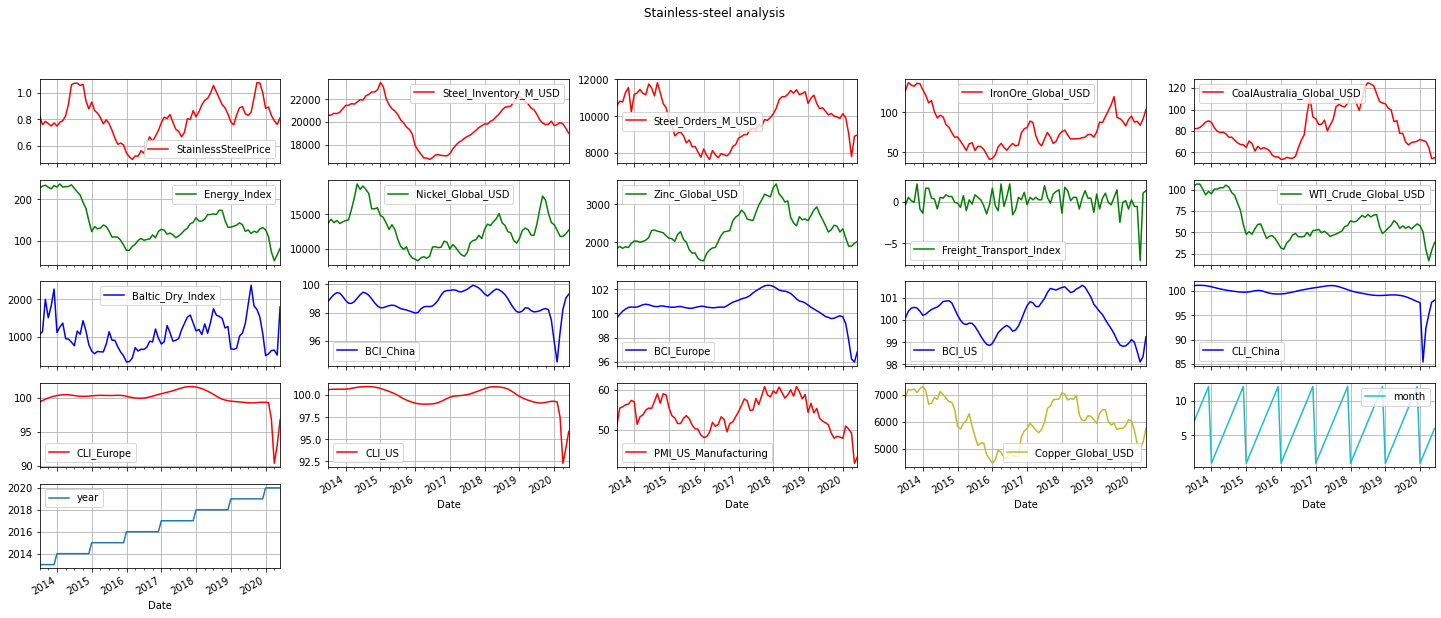

In [9]:
#@title Variation of individual feauture over the time.
rcParams['figure.figsize'] = 25, 10

df_date.plot(kind='line', subplots=True, grid=True, title="Stainless-steel analysis",
             layout=(5, 5), sharex=True, sharey=False, legend=True,    
            style=['r', 'r', 'r','r', 'r', 'g', 'g', 'g', 'g', 'g', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r']);

In majority of the features there is a big dip for the years 2016 and 2017 and then it rose again and maintained the mean. 

Iron_ore, Nickel, Copper global shows similar trend.

Decreasing trend for Energy Index and WTI_crude_Global can be seen. Freight_transport, BSI China, Europe, CLI China, Europe, US doesnt show much variance with time except at  mid of 2020. 

In [10]:
#@title Stainless-steel price from July-2013 till June-2020. Can use sliders to see the data in some specific range.

fig = px.bar(df_date, x = df_date.index.values, y = 'StainlessSteelPrice', title = 'Stainless-steel price ', color='month' )
fig.update_xaxes(rangeslider_visible=True)
fig.show()


There is a rise in prices of stainless-steel during the months of july-oct for few years but its not consistent through out. 

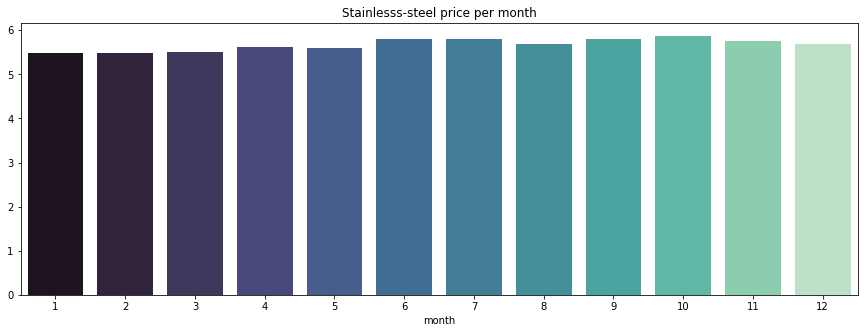

In [11]:
#@title Stainlesss-steel price per month
weekly_report = df_date['StainlessSteelPrice'].groupby(df_date['month']).agg('sum')
#print(weekly_report)
#plt.figure(figsize=(1,1))
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
sns.barplot(x = weekly_report.index, y = weekly_report.values, palette = 'mako')
plt.title('Stainlesss-steel price per month')
plt.show()

There is a slight rise in the price of Stainless-steel as the months goes by through the year however, it is not very significant comparatively. 

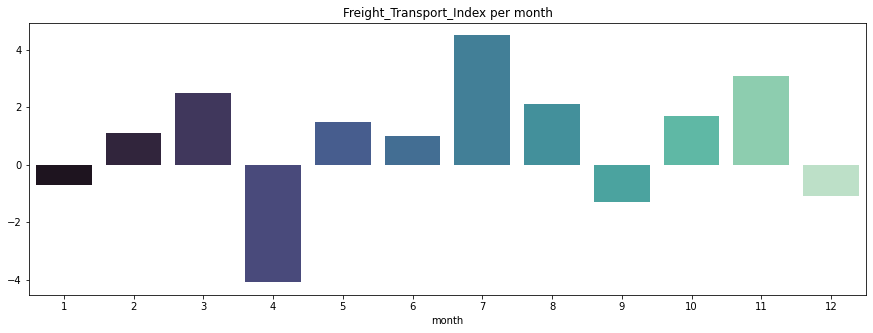

In [12]:
#@title Freight transport Index per month
weekly_report = df_date['Freight_Transport_Index'].groupby(df_date['month']).agg('sum')
#print(weekly_report)
#plt.figure(figsize=(1,1))
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5
sns.barplot(x = weekly_report.index, y = weekly_report.values, palette = 'mako')
plt.title('Freight_Transport_Index per month')
plt.show()

During April of the year, the Fright transport index is significantly low and during the month of  July its very high.

###<a name="bivariate_id">**Correlation**</a>

Correlation determines how one variables moves/changes in relation with the other variable. 
 



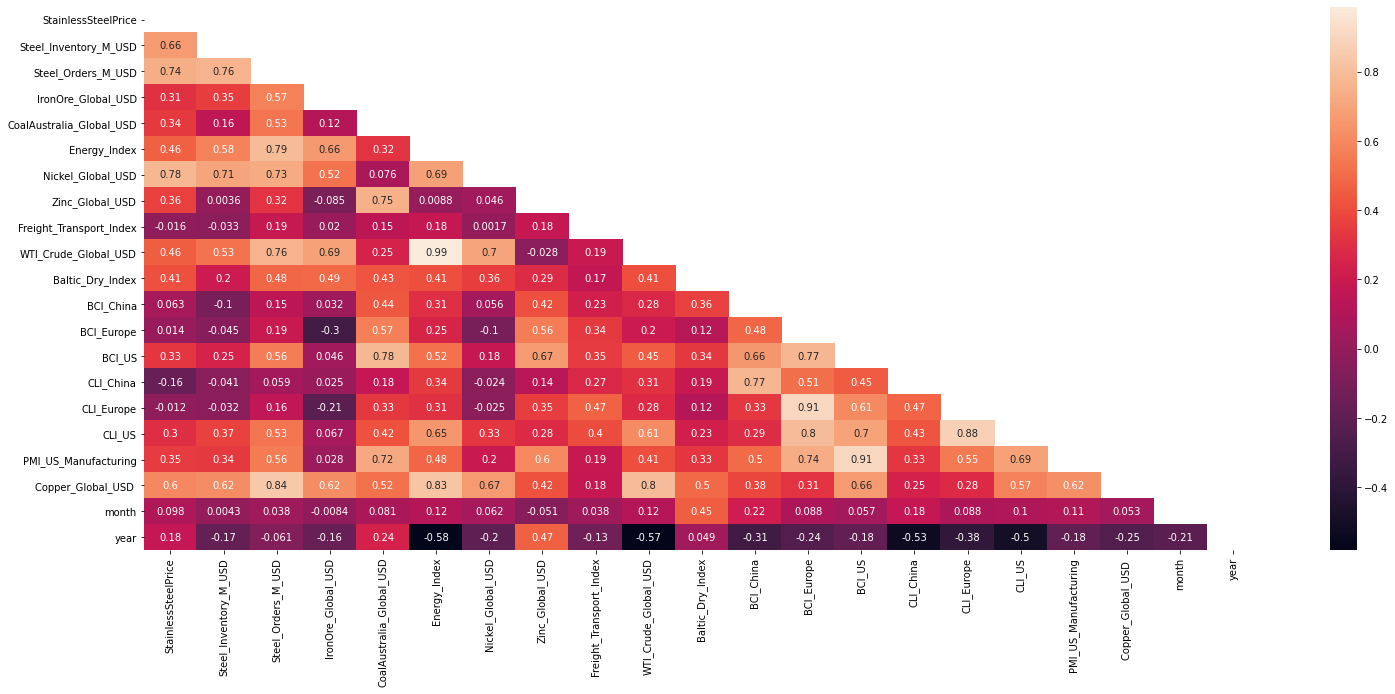

In [13]:
#@title Correlation between different variables of dataset
rcParams['figure.figsize'] = 25, 10
df_corr = df_date.copy()
#df_corr = df.drop(columns=[''])
corr= df_corr.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix);

There is very strong positive correlation between:
 

*   Energy index -- WTI Crude global 
*   CLI Europe -- BCI Europe
*   BCI US -- PMI US Manufacturing

Other features like CLI US-- CLI Europe, Copper Global--Energy Index, Copper global -- Steel orders etc are also positively correlated.

Features like 'Steel_Inventory_M_USD', 'Steel_Orders_M_USD', 'Energy_Index','Nickel_Global_USD', 'Copper_Global_USD ', 'month'  are positively corelated to Stainless-steel price





###<a name="time_id">**Time Series Component analysis**</a>

Lets understand how a time series can be split into its various components that is the Trend, Seasonality, and residuals

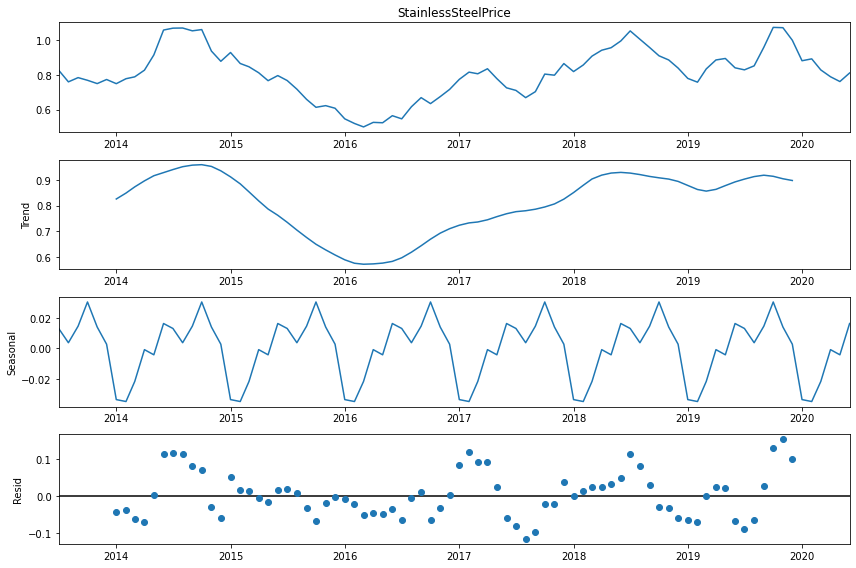

In [14]:
#@title Seasonal decomposition
#The additive model is useful when the seasonal variation is relatively constant over time.
#The multiplicative model is useful when the seasonal variation increases over time.
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(df_date.StainlessSteelPrice, model='additive') # additive seasonal index

fig = decomposition.plot()
plt.show()

A clear seasonal patter is visible in the above graph. The Trend is not linear. It went down during 2016 and then kept on rising untill it maintained the previous average(2014-15)

###<a name="select_id">**Feature Selection**</a>

#### **Drop Features Using Pearson Correlation**
Check the correlation between different features and features which are highly corelated can be removed as they simply act as a duplicate feature

In [15]:
#@title 
# With the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

x = df_date.drop(columns='StainlessSteelPrice')
corr_features = correlation(x, 0.8)

print(f'When taken the threshhold of 80%, {len(set(corr_features))} features came out to be highly corelated and if given to model as an input, it will act as duplicate values.') 
print(corr_features)

When taken the threshhold of 80%, 5 features came out to be highly corelated and if given to model as an input, it will act as duplicate values.
{'PMI_US_Manufacturing', 'WTI_Crude_Global_USD', 'CLI_US', 'Copper_Global_USD ', 'CLI_Europe'}


In [16]:
#Now we can drop these columns from our dataset. 
x_corr_df = x.drop(corr_features,axis=1)

#### **Decision trees for feature selection** 

In [17]:
from sklearn.ensemble import ExtraTreesRegressor
#This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees)

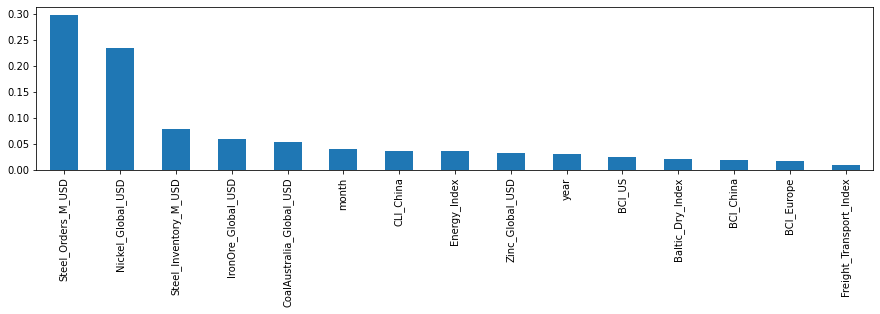

In [18]:
model = ExtraTreesRegressor()
model.fit(x_corr_df,df_date.StainlessSteelPrice);

# feature_importances_
#The impurity-based feature importances.
# The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction
# of the criterion brought by that feature. It is also known as the Gini importance.
feature_importance = model.feature_importances_

# converting the values of feature importance into bar graph for better visulization.
feature_import = pd.Series(feature_importance,index=x_corr_df.columns)
feature_import.nlargest(15).plot(kind='bar',figsize=(15, 3))
plt.show()


Discussing with domain expert we can take or leave the features. For now I am taking top 8 features. 

In [19]:
feature_import.nlargest(8).index

Index(['Steel_Orders_M_USD', 'Nickel_Global_USD', 'Steel_Inventory_M_USD',
       'IronOre_Global_USD', 'CoalAustralia_Global_USD', 'month', 'CLI_China',
       'Energy_Index'],
      dtype='object')

In [20]:
# including target for removing outliars 
final_features = df_date[['StainlessSteelPrice','Steel_Orders_M_USD', 'Nickel_Global_USD', 'Steel_Inventory_M_USD','IronOre_Global_USD', 'Energy_Index', 'Zinc_Global_USD', 'year','month']]

In [21]:
final_features.head(2)

,StainlessSteelPrice,Steel_Orders_M_USD,Nickel_Global_USD,Steel_Inventory_M_USD,IronOre_Global_USD,Energy_Index,Zinc_Global_USD,year,month
Date,,,,,,,,,
2013-07-01,0.827352,10568,13750.31522,20575,127.191304,227.022942,1837.619565,2013,7
2013-08-01,0.760221,10821,14308.26190,20609,137.055000,232.234194,1896.392857,2013,8


###<a name="outlier_id">**Outlier removal**</a>

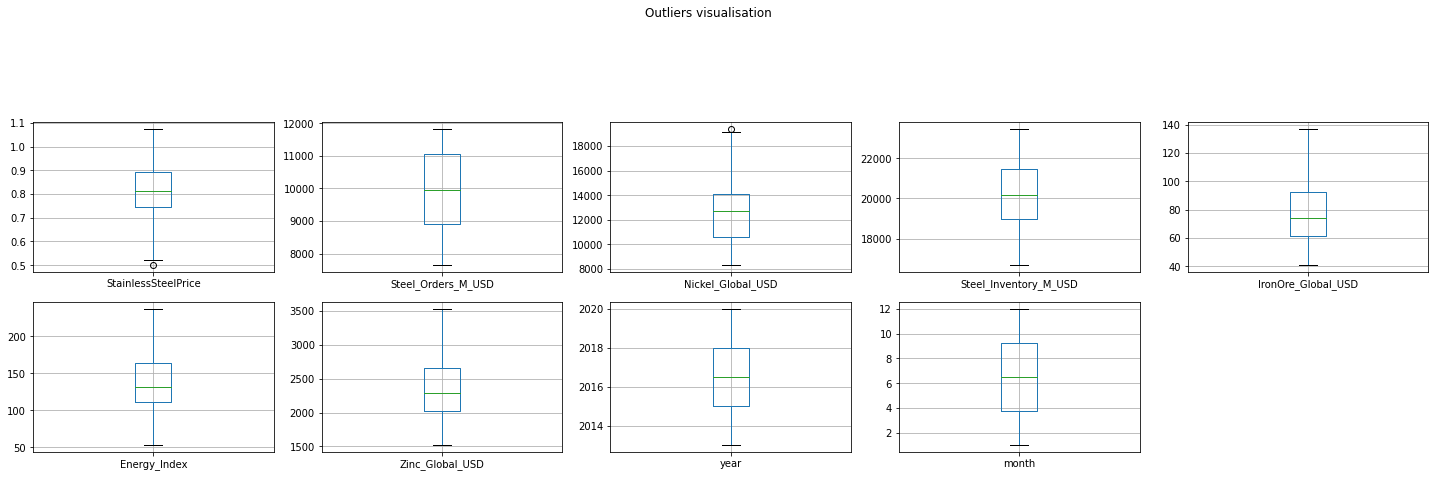

In [22]:
#@title Display the summary of the set of data values having properties like minimum, first quartile, median, third quartile and maximum
# IQR is the interquartile range
from pylab import rcParams
rcParams['figure.figsize'] = 25, 16
final_features.plot(kind='box', subplots=True, grid=True, title="Outliers visualisation",
             layout=(5, 5), sharex=True, sharey=False, legend=True);

The outliers (the '**o**' markers in the plot) are simply points outside of the wide [(Q1-1.5 IQR), (Q3+1.5 IQR)] margin

There different ways to detect the outliers for example by using scatterplot,  Zscore, IQR interQuantileRange etc.  But since its a multivariate dataset, I would use :

#### **Outlier Removal With Mahalanobis Distance**

In [23]:
def MahalanobisDist(data, verbose=False):
  #The Covariance represents the direction of the relationship between two variables (i.e. positive, negative or zero),
  # so it shows the strength of how one variable is related to the changes of the others.
    covariance_matrix = np.cov(data, rowvar=False)
    if is_pos_def(covariance_matrix):
         #find the Inverse of the Covariance Matrix:
        inv_covariance_matrix = np.linalg.inv(covariance_matrix)

        #Then, we find the mean m of the variables on each feature (shall I say dimension) and save them in an array like this:
        if is_pos_def(inv_covariance_matrix):
            vars_mean = []
            for i in range(data.shape[0]):
                vars_mean.append(list(data.mean(axis=0)))
            #Next, we find x - m (i.e. the differential), but since we already have the vectorized vars_mean, all we need to do is:
            diff = data - vars_mean # here we subtract the mean of feature
            
            ##Finally, apply the formula like this: 
            md = []
            for i in range(len(diff)):
                md.append(np.sqrt(diff[i].dot(inv_covariance_matrix).dot(diff[i])))

            if verbose:
                #print("Mahalanobis Distance:\n {}\n".format(md))
                pass
            return md
        else:
            print("Error: Inverse of Covariance Matrix is not positive definite!")
    else:
        print("Error: Covariance Matrix is not positive definite!")


def MD_detectOutliers(data, extreme=False, verbose=False):
    MD = MahalanobisDist(data, verbose)

    std = np.std(MD)
    k = 3. * std if extreme else 2. * std
    m = np.mean(MD)
    up_t = m + k
    low_t = m - k
    outliers = []
    for i in range(len(MD)):
        if (MD[i] >= up_t) or (MD[i] <= low_t):
            outliers.append(i)  # index of the outlier
    return np.array(outliers)

# But before proceeding, we should check, as mentioned above, if the matrix and its inverse are Symmetric and Positive Definite.
# We use for this Cholesky Decomposition Algorithm, which, fortunately, is already implemented in numpy.linalg.cholesky:
def is_pos_def(A):
    if np.allclose(A, A.T):
        try:
            np.linalg.cholesky(A)
            return True
        except np.linalg.LinAlgError:
            return False
    else:
        return False
outliers_indices = MD_detectOutliers(final_features.values, verbose=True)

print("Outliers Indices: {}\n".format(outliers_indices))

Outliers Indices: [ 4  5 17 18 48]



In [24]:
new = final_features.reset_index()
final_df = new.drop(outliers_indices)
final_df.set_index('Date', inplace=True)
final_df.sort_values(by='Date', ascending=True, inplace=True)

In [25]:
#@title After removing outliers
print(f'Total length of dataset is ; {len(df_date)}')
print(f'Length of dataset after removing outliers by using Mahalanobis method is ; {len(final_df)}')

Total length of dataset is ; 84
Length of dataset after removing outliers by using Mahalanobis method is ; 79


In [26]:
final_df.head(2)

,StainlessSteelPrice,Steel_Orders_M_USD,Nickel_Global_USD,Steel_Inventory_M_USD,IronOre_Global_USD,Energy_Index,Zinc_Global_USD,year,month
Date,,,,,,,,,
2013-07-01,0.827352,10568,13750.31522,20575,127.191304,227.022942,1837.619565,2013,7
2013-08-01,0.760221,10821,14308.26190,20609,137.055000,232.234194,1896.392857,2013,8


###<a name="split_id">**Split data into test train datasets**</a>

In [27]:
# Dividing the data into  train, test
train_size = int(len(final_df)*.85)
test_size = len(final_df) - train_size
train,test = final_df.iloc[0:train_size], final_df.iloc[train_size:len(final_df)]
print(train.shape, test.shape)

(67, 9) (12, 9)


###<a name="scale_id">**Scaling data**</a>

Standardize features by removing the mean and scaling to unit variance

In [28]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaled_train = scaler.fit_transform(train)

## <Center> <a name="models_id">**Forecasting Models**</a>
I will implement different Statistical, Machine learning and Deep learning models and compare the result in the end.

### <a name="ma_id">**Simple moving average method**</a>

Forecast= Average of only the last few observations to forecast the future 

Reduces unsystematic noise in the data

In [56]:
y_hat_sma = final_df[['StainlessSteelPrice']].copy()
ma_window = 3  # Considered 3 month window
y_hat_sma['sma_forecast'] = final_df['StainlessSteelPrice'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_size:] = y_hat_sma['sma_forecast'][train_size-1]

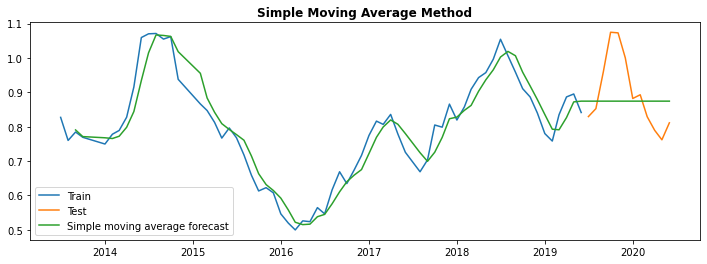

In [57]:
#@title Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['StainlessSteelPrice'], label='Train' )
plt.plot(test['StainlessSteelPrice'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method', fontweight= 'bold')
plt.show()

In [58]:
#@title Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['StainlessSteelPrice'], y_hat_sma['sma_forecast'][train_size:])).round(2)
mape = np.round(np.mean(np.abs(test['StainlessSteelPrice']-y_hat_sma['sma_forecast'][train_size:])/test['StainlessSteelPrice'])*100,2)

results = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,0.1,9.03



### <a name="holt_id">**Holt Winters' additive method with trend and seasonality**</a>
Forecasts based on level, trend and seasonality of a time series

In [59]:
y_hat_hwa =  test[['StainlessSteelPrice']].copy()
model = ExponentialSmoothing(np.asarray(train['StainlessSteelPrice']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.9999999850988388, 'smoothing_trend': 3.519800754497272e-18, 'smoothing_seasonal': 1.4829879991241773e-08, 'damping_trend': nan, 'initial_level': 0.7605897556051975, 'initial_trend': 0.0007808627095916517, 'initial_seasons': array([0.06588141, 0.0418998 , 0.02673524, 0.03524508, 0.03744062,
       0.0487754 , 0.02980269, 0.05181006, 0.03834743, 0.06769598,
       0.07857849, 0.05586399]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [60]:
# Next 6 months of prediction
model = ExponentialSmoothing(np.asarray(final_df['StainlessSteelPrice']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
forecast_6 = model_fit.forecast(6)
forecast_dates = pd.date_range(test.index.values[-1],periods=6,freq='1M').tolist()
df_forecast = pd.DataFrame({'date':forecast_dates, 'StainlessSteelPrice':forecast_6} )
df_forecast['date'] = pd.to_datetime(df_forecast['date'])
df_forecast = df_forecast.set_index('date')

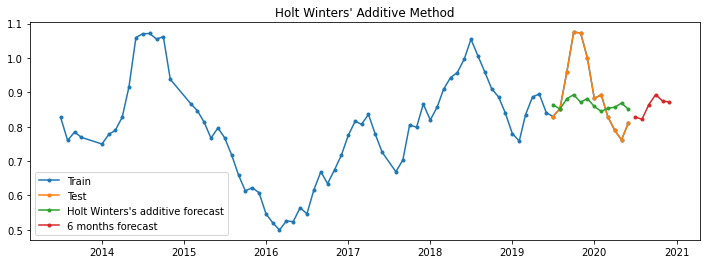

In [61]:
#@title Holt Winters\'s additive forecast
plt.figure(figsize=(12,4))
plt.plot(final_df['StainlessSteelPrice'], label='Train', marker='.')
plt.plot(test['StainlessSteelPrice'], label='Test', marker='.')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast', marker='.')
plt.plot(df_forecast['StainlessSteelPrice'], label='6 months forecast', marker='.')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()


In [62]:
#@title Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['StainlessSteelPrice'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['StainlessSteelPrice']-y_hat_hwa['hw_forecast'])/test['StainlessSteelPrice'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,0.1,9.03
0,Holt Winters' additive method,0.1,8.21


In [63]:
#@title Price prediction
print(f"Expected prices of Stainless-Steel for the next 6 months are :{df_forecast['StainlessSteelPrice'].values}")

Expected prices of Stainless-Steel for the next 6 months are :[0.82846318 0.82175639 0.86472785 0.89348364 0.87491262 0.87178092]




---




### <a name="ar_id">**Auto Regressive methods**</a>
In an autoregressive model, the regression technique is used to formulate a time series problem. In order to implement autoregressive models, we forecast future observations using a linear combination of past observations of the same variable

#### Checking data: Stationary or Non stationary

Null Hypothesis  (H0) : The series is not stationary  p−value>0.05 

Alternate Hypothesis: (H1)  The series is stationary  p−value<=0.05

In [64]:
# Augmented Dickey-Fuller (ADF) test
adf_test = adfuller(final_df['StainlessSteelPrice'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -2.429812
Critical Values @ 0.05: -2.90
p-value: 0.133498


We can see that p-value is 0.133498, which is more than 0.05.So The series is **Non stationary**. And accept the null hypothesis  (H0) . 

We can convert a non-stationary series into stationary series by: Differencing or Transformation

#### Converting non stationary data into stationary

**Differencing** is performed by subtracting the previous observation from the current observation. Differencing can remove both Trend and seasonality in a Time series.

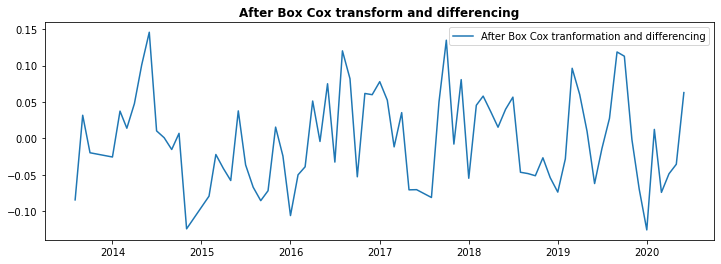

In [65]:
#@title
# Box-Cox Transformation makes the variance constant in a Time series.
 #The objective is to obtain a normal distribution of the transformed data 

data_boxcox = pd.Series(boxcox(final_df['StainlessSteelPrice'], lmbda=0), index = final_df.index)

data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), final_df.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing', fontweight='bold')
plt.show()

In [66]:
# Test again to check the data is still non-stationary
data_boxcox_diff.dropna(inplace=True)
adf_test = adfuller(data_boxcox_diff)
print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -6.060932
Critical Values @ 0.05: -2.90
p-value: 0.000000


 p-value is 0.000 < 0.05, Reject the null hypothesis  (H0). 
 
 

*   The series looks Stationary
*   The fluctuations are under constant limits
*   The mean is also centered around zero






Thus after performing the Stationarity Tests we can see that we are able to convert a non-stationary series into a stationary series to build an Auto Regressive model.

**Autocorrelation function (ACF)**
The correlation of the time series observations with values of the same series at previous times(lags) is called autocorrelation.

**ACF** describes the autocorrelation between observation and another observation at a prior time step that includes direct and indirect dependence information.

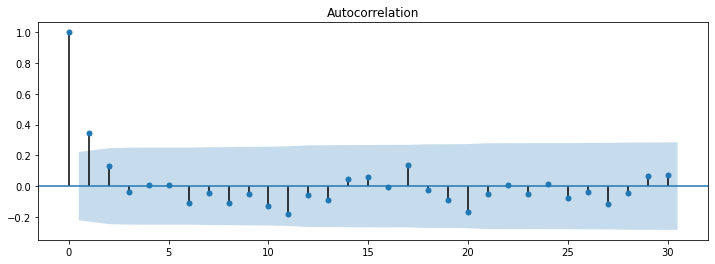

In [67]:
#@title ACF plot

plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

**Partial autocorrelation function (PACF)**
The PACF only describes the direct relationship between an observation and its lag

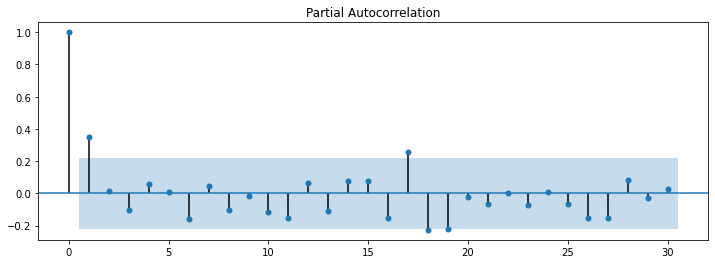

In [68]:
#@title 
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 30)
plt.show()

In [69]:
# Splitting data into test train after transformation
train_data_boxcox = data_boxcox[:train_size]
test_data_boxcox = data_boxcox[train_size:]
train_data_boxcox_diff = data_boxcox_diff[:train_size-1]
test_data_boxcox_diff = data_boxcox_diff[train_size-1:]

In [70]:
# Check the best parameters for the model for second reference. 
stepwisefit = auto_arima(train_data_boxcox_diff, trace=True, suppress_warnings=True, seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-175.996, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-176.216, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-181.660, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-180.253, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-178.214, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-179.906, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-179.873, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-177.957, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-183.653, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-181.898, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-181.866, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-182.252, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-179.950, Time=0.11 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.131 seconds


The Goal is to reduce AIC : The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data.Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. Thus, AIC provides a means for model selection.

In [71]:
stepwisefit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   66
Model:               SARIMAX(1, 0, 0)   Log Likelihood                  93.827
Date:                Mon, 19 Jul 2021   AIC                           -183.653
Time:                        21:57:25   BIC                           -179.274
Sample:                             0   HQIC                          -181.923
                                 - 66                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3311      0.126      2.628      0.009       0.084       0.578
sigma2         0.0034      0.001      4.585      0.000       0.002       0.005
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 2.15
Prob(Q):                              0.83   Prob(JB):                         0.34
Heteroskedasticity (H):               1.05   Skew:                             0.25
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### **The parameters from above method was giving high loss,  so I am creating my own custom loop to find better hyper parameters for the Sarima model.**

In [72]:
import itertools
p=d=q = range(0,2)

pdq = list(itertools.product(p,d,q)) 
seasonal_pdq = [(x[0],x[1],x[2], 12) for x in list(itertools.product(p,d,q))]
metric_aic_dic = dict()
for pm in pdq:
  for pm_seasonal in seasonal_pdq:
    try:
      model = SARIMAX(data_boxcox_diff, order=pm, seasonal_order=pm_seasonal, enforce_stationarity=False, enforce_invertibility=False)
      model_aic = model.fit()
      print('Arima{}*{}12 - AIC{}'.format(pm, pm_seasonal,model_aic.aic))
      metric_aic_dic.update({(pm,pm_seasonal):model_aic.aic})
    except:
      continue

Arima(0, 0, 0)*(0, 0, 0, 12)12 - AIC-204.99570235488505
Arima(0, 0, 0)*(0, 0, 1, 12)12 - AIC-168.2751415775282
Arima(0, 0, 0)*(0, 1, 0, 12)12 - AIC-123.94327295172397
Arima(0, 0, 0)*(0, 1, 1, 12)12 - AIC-126.3596286572693
Arima(0, 0, 0)*(1, 0, 0, 12)12 - AIC-172.23586623966338
Arima(0, 0, 0)*(1, 0, 1, 12)12 - AIC-168.28017282942272
Arima(0, 0, 0)*(1, 1, 0, 12)12 - AIC-119.3162126651657
Arima(0, 0, 0)*(1, 1, 1, 12)12 - AIC-116.95163635094292
Arima(0, 0, 1)*(0, 0, 0, 12)12 - AIC-208.5864318663871
Arima(0, 0, 1)*(0, 0, 1, 12)12 - AIC-172.4774648155052
Arima(0, 0, 1)*(0, 1, 0, 12)12 - AIC-137.33349712055042
Arima(0, 0, 1)*(0, 1, 1, 12)12 - AIC-126.22643620004973
Arima(0, 0, 1)*(1, 0, 0, 12)12 - AIC-176.6515197664113
Arima(0, 0, 1)*(1, 0, 1, 12)12 - AIC-170.51851637997174
Arima(0, 0, 1)*(1, 1, 0, 12)12 - AIC-126.605837395608
Arima(0, 0, 1)*(1, 1, 1, 12)12 - AIC-122.03189657241427
Arima(0, 1, 0)*(0, 0, 0, 12)12 - AIC-183.48256791583788
Arima(0, 1, 0)*(0, 0, 1, 12)12 - AIC-152.78244235881192



### <a name="sarima_id">**Seasonal auto regressive integrated moving average (SARIMAx)**</a>

SARIMA Model has both non seasonal elements and seasonal elements.
Checking the parameters from the above function,  following function is the best fit:

Arima(1, 1, 0)*(1, 1, 0, 12)12     :      AIC-107.65466961291827

In [73]:
# Prediction for the test data
model = SARIMAX(data_boxcox_diff, order=(1, 1,0 ), seasonal_order=(1, 1, 0, 12)) 
model_fit = model.fit()
# Recover data
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(test_data_boxcox_diff.index.min(), test_data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
# Forecasting next 6 months
sarima_test_forcast = model_fit.forecast(6)
#cii = sarima_test_forcast.conf_int()
sarima_test_forcast = np.exp(sarima_test_forcast)
forecast_dates = pd.date_range(test_data_boxcox_diff.index.max(),periods=7,freq='1M').tolist()
forecast_dates = forecast_dates[1:]
sarima_test_forcast.index= forecast_dates
y_hat_sarima['sarima_forecast_6months'] = sarima_test_forcast

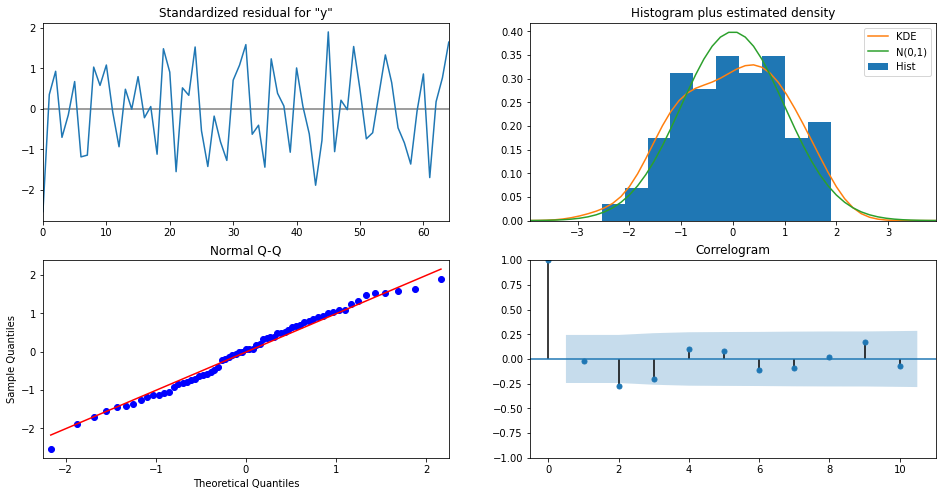

In [74]:
#@title Model diagnostic plot to check the residuals
# Model diagnostic plot to check the residuals.
model_fit.plot_diagnostics(figsize=(16,8));

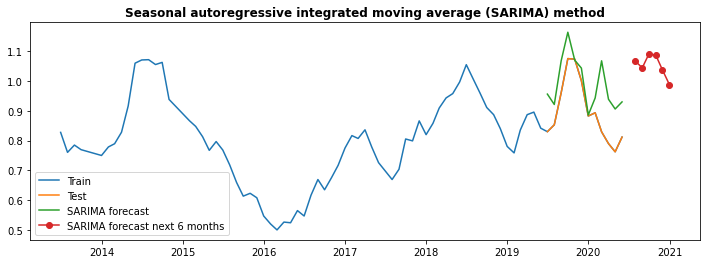

In [75]:
#@title SARIMA forecast
plt.figure(figsize=(12,4))
plt.plot(final_df['StainlessSteelPrice'], label='Train')
plt.plot(test['StainlessSteelPrice'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test_data_boxcox_diff.index.min():], label='SARIMA forecast')
plt.plot(y_hat_sarima['sarima_forecast_6months'], label='SARIMA forecast next 6 months',  marker='o')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method',fontweight='bold')
plt.show()

In [76]:
#@title Forecast for the next 6 months
print(f"Forecast for the next 6 months : {sarima_test_forcast}")

Forecast for the next 6 months : 2020-07-31    1.066322
2020-08-31    1.044009
2020-09-30    1.090707
2020-10-31    1.086442
2020-11-30    1.036869
2020-12-31    0.987981
Name: predicted_mean, dtype: float64


Around one year of test data is used for forecasting to check the accuracy of the model. Later the model is trained on complete dataset and 6 months is predicted. 

In [77]:
#@title Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['StainlessSteelPrice'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['StainlessSteelPrice']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['StainlessSteelPrice'])*100,2)

tempResults = pd.DataFrame({'Method':['(SARIMA) Seasonal autoregressive integrated moving average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results


,Method,RMSE,MAPE
0,Simple moving average forecast,0.10,9.03
0,Holt Winters' additive method,0.10,8.21
0,(SARIMA) Seasonal autoregressive integrated mo...,0.11,11.18


Till now we have been using univariate forecasting. Now I will try few algorithms with multivariate 


### <a name="lstm_id">**LSTM Recursive Multi-step Forecast Model**</a>

#### Preprocessing

In [78]:
# Feature scaling
last_date = final_df.index.values[-1]
colms = [ 'Steel_Orders_M_USD', 'Nickel_Global_USD',
       'Steel_Inventory_M_USD', 'IronOre_Global_USD', 'Energy_Index',
       'Zinc_Global_USD', 'year', 'month']

scaler_var = StandardScaler()
scaler_cnt = StandardScaler()

# scaling features and target column seperatly so that its easy to scaleback while interpretting results
lstm_train = train.copy()
scaler_var = scaler_var.fit(lstm_train.loc[:,colms])
scaler_cnt = scaler_cnt.fit(lstm_train[['StainlessSteelPrice']])

lstm_train.loc[:,colms] = scaler_var.transform(lstm_train.loc[:,colms])
lstm_train['StainlessSteelPrice'] = scaler_cnt.transform(lstm_train[['StainlessSteelPrice']])

lstm_test = test.copy()
lstm_test.loc[:,colms] = scaler_var.transform(lstm_test.loc[:,colms])
lstm_test['StainlessSteelPrice'] = scaler_cnt.transform(lstm_test[['StainlessSteelPrice']])

In [79]:
# For the time series forecasting, we need to prepare the data before we feed to the LSTM in a proper format. 

#### Lets say from last 4 week values and want to predict the 5th value, so we can create a dataset in such a way that          #######
#### first 4 values with be the training dataset and 5th value would be the target  value                                       #######


# Creating a function to extract y values(target) values from the previous n values 
from keras import optimizers
def create_dataset(X, y, time_steps=1):
  Xs, ys = [],[]
  for i in range(len(X)-time_steps):
    val = X.iloc[i: (i+time_steps)].to_numpy()
    Xs.append(val)
    ys.append(y.iloc[i + time_steps])
  return np.array(Xs), np.array(ys)

time_steps=1

x_train, y_train = create_dataset(lstm_train, lstm_train.StainlessSteelPrice,time_steps = time_steps)
x_test, y_test = create_dataset(lstm_test, lstm_test.StainlessSteelPrice, time_steps = time_steps)

# [Samples, Time-steps, n_features]
print(f'Shape of training data:  {x_train.shape}  and target variable: {y_train.shape}')

Shape of training data:  (66, 1, 9)  and target variable: (66,)


#### **Hyper-parameter tuning of LSTM Model**

In [80]:
# model for extracting correct hyperparameters
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=hp.Int('units', min_value=32,max_value=512,step=64),                                                        
                                                         input_shape=(x_train.shape[1], x_train.shape[2]),return_sequences=True)))
  model.add(keras.layers.LSTM(hp.Int('units"', min_value=32,max_value=512,step=64),
                              activation='relu',return_sequences=True))
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(keras.layers.Dense(units=1))

  model.compile(loss='mean_squared_error',
                optimizer=optimizers.Adam(hp.Choice('learning rate', values=[0.1,0.01,0.001,0.0001])),
                metrics=['mean_squared_error']
                )
  return model

In [81]:
#!rm -rf untitled_project

In [82]:
tuner = RandomSearch(build_model,
                     objective='val_mean_squared_error',
                     max_trials=5,
                     executions_per_trial =3,
                     directory='/content/untitled_project',
                     project_name='Stainless_steel_project')

In [83]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 64, 'sampling': None}
units" (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 64, 'sampling': None}
learning rate (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.01, 0.001, 0.0001], 'ordered': True}


In [84]:
tuner.search(x_train,y_train,epochs=40,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 30s]
val_mean_squared_error: 0.043099685261646904

Best val_mean_squared_error So Far: 0.04137389858563741
Total elapsed time: 00h 03m 23s
INFO:tensorflow:Oracle triggered exit


In [85]:
tuner.results_summary()

Results summary
Results in /content/untitled_project/Stainless_steel_project
Showing 10 best trials
Objective(name='val_mean_squared_error', direction='min')
Trial summary
Hyperparameters:
units: 416
units": 224
learning rate: 0.01
Score: 0.04137389858563741
Trial summary
Hyperparameters:
units: 288
units": 352
learning rate: 0.01
Score: 0.04249307389060656
Trial summary
Hyperparameters:
units: 288
units": 96
learning rate: 0.01
Score: 0.043099685261646904
Trial summary
Hyperparameters:
units: 416
units": 96
learning rate: 0.1
Score: 0.2395235151052475
Trial summary
Hyperparameters:
units: 352
units": 480
learning rate: 0.1
Score: 13.680744647979736


**Best hyper parameters** :

Hyperparameters:

units: 224

units": 160

learning rate: 0.0001

Score: 0.9013959368069967

In [86]:
# LSTM Model
def lstm_model(x_train,y_train):
  model = keras.Sequential()
  model.add(keras.layers.Bidirectional(keras.layers.LSTM(units=224,input_shape=(x_train.shape[1], x_train.shape[2]),return_sequences=True)))
  model.add(keras.layers.LSTM(160,activation='relu',return_sequences=True))
  model.add(keras.layers.Dropout(rate=0.2))
  model.add(keras.layers.Dense(units=1))
  adm = optimizers.Adam(lr=0.0001)

  model.compile(loss='mean_squared_error',optimizer=adm)

  history = model.fit(
      x_train,y_train,
      epochs=60,
      batch_size=1,
      validation_split=0.1,
      shuffle=False)
  return model,history

model,history = lstm_model(x_train,y_train) 

Epoch 1/60
59/59 [==============================] - 6s 35ms/step - loss: 1.1203 - val_loss: 0.1622
Epoch 2/60
59/59 [==============================] - 0s 8ms/step - loss: 1.0446 - val_loss: 0.1490
Epoch 3/60
59/59 [==============================] - 0s 7ms/step - loss: 0.9621 - val_loss: 0.1334
Epoch 4/60
59/59 [==============================] - 0s 8ms/step - loss: 0.8423 - val_loss: 0.1129
Epoch 5/60
59/59 [==============================] - 0s 7ms/step - loss: 0.6606 - val_loss: 0.0883
Epoch 6/60
59/59 [==============================] - 0s 8ms/step - loss: 0.4386 - val_loss: 0.0672
Epoch 7/60
59/59 [==============================] - 0s 8ms/step - loss: 0.2200 - val_loss: 0.0641
Epoch 8/60
59/59 [==============================] - 0s 7ms/step - loss: 0.1204 - val_loss: 0.0819
Epoch 9/60
59/59 [==============================] - 0s 8ms/step - loss: 0.0822 - val_loss: 0.1066
Epoch 10/60
59/59 [==============================] - 0s 7ms/step - loss: 0.0672 - val_loss: 0.1219
Epoch 11/60
59/59 

#### Evaluation

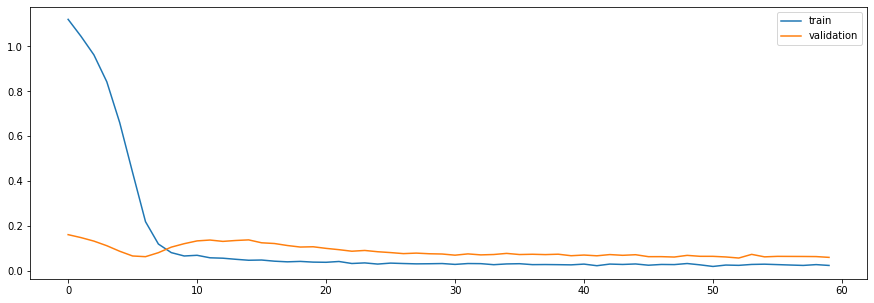

In [87]:
#@title Loss curve
rcParams['figure.figsize'] = 15, 5
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()

In [88]:
#@title Pedicting and scaling back the data for plotting

# Predicting train data 
x_train_pred = model.predict(x_train)
# Scaling back
Predicted_train_data = scaler_cnt.inverse_transform(x_train_pred.reshape(1,-1))
Actual_train_data = scaler_cnt.inverse_transform(y_train.reshape(1,-1))

# Predicting test data 
y_test_pred = model.predict(x_test)
# Scaling back test data 
Predicted_test_data = scaler_cnt.inverse_transform(y_test_pred.reshape(1,-1))
Actual_test_data = scaler_cnt.inverse_transform(y_test.reshape(1,-1))


In [89]:
#@title Calculate RMSE and MAPE performance metrics for test data 
### Calculating Root mean square error


#print(f'Root mean square error of test data is : {math.sqrt(mean_squared_error(Actual_test_data,Predicted_test_data))}')


rmse = math.sqrt(mean_squared_error(Actual_test_data,Predicted_test_data))
mape = np.round(np.mean(np.abs(Actual_test_data-Predicted_test_data)/Actual_test_data)*100,2)

tempResults = pd.DataFrame({'Method':['(LSTM) Long short-term memory'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,0.100000,9.03
0,Holt Winters' additive method,0.100000,8.21
0,(SARIMA) Seasonal autoregressive integrated mo...,0.110000,11.18
0,(LSTM) Long short-term memory,0.037271,3.18


#### Future prediction

I have data till June 2020, I can predict the 'StainlessSteelPrice' for month of July with the data of june. Then the predicted StainlessSteelPrice of July would be input for the month of August prediction. The values of other features for the month of August can be taken from the aggregated data or could be individually forcasted and then used. 

In this project, I created a mean of each value for each month. For example I have taken mean of 'Nickel_Global_USD' for ever month from January to December.

It is safe to assume that the consuption of a Nickel_Global_USD on the month  of July is close to the sum of mean of that Nickel_Global_USD of all July.

In [90]:
# Aggregating the data so that it can be used for future predictions 
steel_inv = final_df['Steel_Orders_M_USD'].groupby(final_df['month']).agg('mean')
nickel = final_df['Nickel_Global_USD'].groupby(final_df['month']).agg('mean')
copper = final_df['Steel_Inventory_M_USD'].groupby(final_df['month']).agg('mean')
iron = final_df['IronOre_Global_USD'].groupby(final_df['month']).agg('mean')
energy = final_df['Energy_Index'].groupby(final_df['month']).agg('mean')
zinc = final_df['Zinc_Global_USD'].groupby(final_df['month']).agg('mean')

#creating a new dataframe
df_avg = pd.concat([steel_inv, nickel,copper,iron,energy,zinc], axis=1)

In [91]:
# Create future dates
forecast_dates = pd.date_range(last_date,periods=7,freq='1M').tolist()
forecast_dates = forecast_dates[1:]

In [92]:
## Create a function which forcast steel price
def get_forecast():
  final_df_forecast = final_df.copy()
  for dates in forecast_dates:
    month = dates.month
    ls = []
    ls.append(final_df_forecast.StainlessSteelPrice[-1])
    ls.append(df_avg['Steel_Orders_M_USD'][month])
    ls.append(df_avg['Nickel_Global_USD'][month])
    ls.append(df_avg['Steel_Inventory_M_USD'][month])
    ls.append(df_avg['IronOre_Global_USD'][month])
    ls.append(df_avg['Energy_Index'][month])
    ls.append(df_avg['Zinc_Global_USD'][month])
    ls.append(dates.year)
    ls.append(month)
    ls_arr = np.asarray(ls) # converting into numpy arary
    df_temp = pd.DataFrame(columns=final_df_forecast.columns) #creating an empty dataframe
    df_length = len(df_temp)
    df_temp.loc[df_length] = ls_arr # adding values for the specific date into dataframe
    df_temp.loc[:,colms] = scaler_var.transform(df_temp.loc[:,colms]) # scaling value to feed to model
    df_temp['StainlessSteelPrice'] = scaler_cnt.transform(df_temp[['StainlessSteelPrice']])
    reshape_inp = df_temp.values.reshape(-1,1, 9) # reshaping input that can be taken by lstm model
    test_pred = model.predict(reshape_inp)# prediction
    test_pred_actual = scaler_cnt.inverse_transform(test_pred.reshape(1,-1)) #scaling back to the orignal shape
    test_pred_actual = scaler_cnt.inverse_transform(test_pred_actual).flatten()

    final_df_forecast.loc[dates] = np.full(shape=9,fill_value=test_pred_actual,dtype=np.float)
  return final_df_forecast


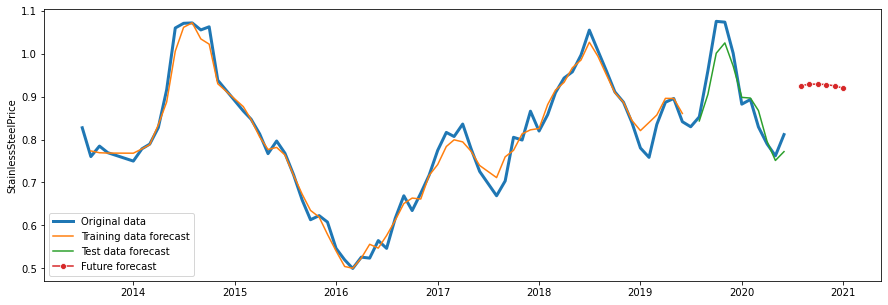

In [93]:
#@title Plotting orignal dataset with forecasted date
# Creating future dates for prediction
final_df_forecast = get_forecast()

sns.lineplot(final_df.index.values,final_df['StainlessSteelPrice'], label ='Original data',linewidth = 3)
sns.lineplot(train.index.values[1:,],Predicted_train_data.flatten(), label ='Training data forecast')
#sns.lineplot(df_test['date'],df_test['sold_qty_units'], label ='Test data forecast')
sns.lineplot(test.index.values[1:,],Predicted_test_data.flatten(), label ='Test data forecast')
sns.lineplot(final_df_forecast.index.values[-6:],final_df_forecast['StainlessSteelPrice'].values[-6:],label ='Future forecast',  marker='o')#linewidth = 3)


The prediction depends on the features of the previous months. For next month prediction, we need last month features. So the first prediction is quite accurate . However, for the second month, we need again the values of the all the other feautes, in ideal condition, we need to forecast each feature seperately, which as the prediction grows will give not very accurate data. Here I have taken the features of last 6 months to make the prediction of next 6 months. 

In [94]:
#@title Forecast for the next 6 months
print(f"Forecast for the next 6 months : {df_forecast['StainlessSteelPrice']}")


Forecast for the next 6 months : date
2020-06-30    0.828463
2020-07-31    0.821756
2020-08-31    0.864728
2020-09-30    0.893484
2020-10-31    0.874913
2020-11-30    0.871781
Name: StainlessSteelPrice, dtype: float64




---



### <a name="prophet_id">**Prophet-multivariate**</a>
### Recursive training and forecasting

After training the model with k best features, I made the forecast for the next date, Once the forecast is made , I trained the model with the forecasted value as input and made prediction again. In this way I recursively trained and forecasted the price of next 6 months. 

#### Data preperation

I tried the prophet model with top 8 best features as calculated and used in above models, but It was giving less accuracy. Hence I tried choosing top 4 features and it gave me decent preformance which can be seen at the end  

In [139]:
# Preparing dataset for the profet model as it takes input value in particular convention (ds,y)
df_prophet_m = final_df.copy()
df_prophet_m = df_prophet_m.reset_index()[['Date','StainlessSteelPrice','Steel_Orders_M_USD','Nickel_Global_USD','Steel_Inventory_M_USD','IronOre_Global_USD']].rename({'Date':'ds','StainlessSteelPrice':'y','Steel_Orders_M_USD':'Steel_Orders_M_USD','Nickel_Global_USD':'Nickel_Global_USD','Steel_Inventory_M_USD ':'Steel_Inventory_M_USD ','IronOre_Global_USD':'IronOre_Global_USD'},axis='columns')
# Dividing the data into train and test set so that when prediction, it need values of other columns, so we can add those information
#from the test dataset
# Dividing the data into  train, test
train_size = int(len(df_prophet_m)*.85)
test_size = len(df_prophet_m) - train_size
train_prophet,test_prophet = df_prophet_m.iloc[0:train_size], df_prophet_m.iloc[train_size:len(df_prophet_m)]


#### Model initialization

In [140]:
# Initializing 
def prophet_model(train_prophet):

  model_prophet_m = Prophet()
  # By defaul, prophet just takes 2 columns. As it is an additive linear model by default. I am adding these columns as additional regressors
  model_prophet_m.add_regressor('Steel_Orders_M_USD',standardize='auto')
  model_prophet_m.add_regressor('Nickel_Global_USD',standardize='auto')
  model_prophet_m.add_regressor('Steel_Inventory_M_USD',standardize='auto')
  model_prophet_m.add_regressor('IronOre_Global_USD',standardize='auto')
  #model_prophet_m.add_regressor('Energy_Index',standardize='auto')
  #model_prophet_m.add_regressor('Zinc_Global_USD',standardize='auto')
  #model_prophet_m.add_regressor('year',standardize='auto')
  #model_prophet_m.add_regressor('month',standardize='auto')
  model_prophet_m.fit(train_prophet)

  return model_prophet_m
model_prophet_m = prophet_model(train_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


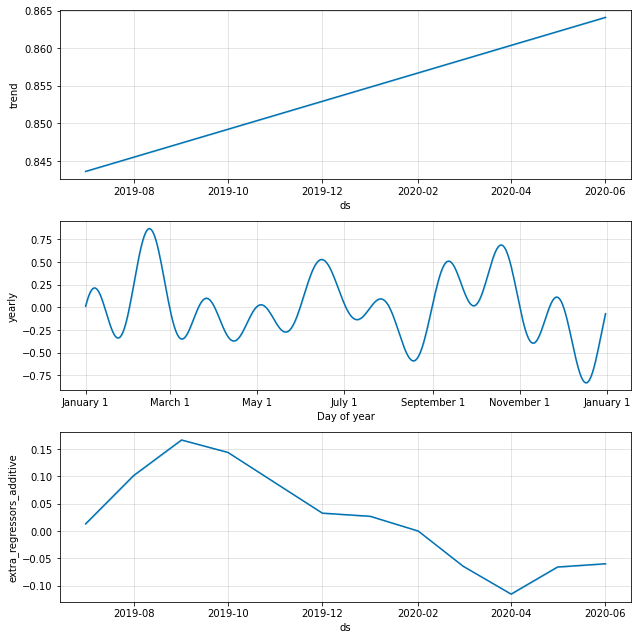

In [101]:
#@title Trend
model_prophet_m.plot_components(forecast_prophet_m);

Trend for just the test data shows that over the period of time , the price of the Stainless-steel is increasing continously. Spike in price, in the months of February, June and october and low prices during the month of August and December is depicted.

#### Forecasting on test and train data

In [141]:
#predict
## Training set
train_prophet_m = train_prophet.drop(columns='y')
forecast_prophet_train = model_prophet_m.predict(train_prophet_m)
#Test set
test_prophet_m = test_prophet.drop(columns='y')
forecast_prophet_m = model_prophet_m.predict(test_prophet_m)

In [144]:
# Aggregating the data so that it can be used for future predictions 
steel_inv = final_df['Steel_Orders_M_USD'].groupby(final_df['month']).agg('mean')
nickel = final_df['Nickel_Global_USD'].groupby(final_df['month']).agg('mean')
inven = final_df['Steel_Inventory_M_USD'].groupby(final_df['month']).agg('mean')
iron = final_df['IronOre_Global_USD'].groupby(final_df['month']).agg('mean')
#creating a new dataframe
df_avg = pd.concat([steel_inv, nickel,inven,iron], axis=1)

In [ ]:
# future prediction dates
forecast_dates = pd.date_range(start='2020-07-01', end='2020-12-01', freq='MS').tolist()
model_prophet_m = prophet_model(df_prophet_m)# initiatizing model with full dataset
## Create a function which forcast steel price
df_prophet_final = df_prophet_m.copy()
def get_forecast():
  
  for dates in forecast_dates:
    month = dates.month
    ls = []
    ls.append(dates)
    ls.append(df_prophet_m['y'].iloc[-1])
    ls.append(df_avg['Steel_Orders_M_USD'][month])
    ls.append(df_avg['Nickel_Global_USD'][month])
    ls.append(df_avg['Steel_Inventory_M_USD'][month])
    ls.append(df_avg['IronOre_Global_USD'][month])
    ls_arr = np.asarray(ls) # converting into numpy arary
    df_prophet_m.loc[dates] = ls_arr

    model_prophet_m = prophet_model(df_prophet_final)#initialize model with most recent update
    input_prof = df_prophet_m.drop(columns='y') # prepare input for prediction
    forecast_prof = model_prophet_m.predict(input_prof.tail(1))# forecasting next price

    #save the prices into the dataframe 
    ls1 = []
    ls1.append(dates)
    ls1.append(np.asarray(forecast_prof['yhat'])[0])
    ls1.append(df_avg['Steel_Orders_M_USD'][month])
    ls1.append(df_avg['Nickel_Global_USD'][month])
    ls1.append(df_avg['Steel_Inventory_M_USD'][month])
    ls1.append(df_avg['IronOre_Global_USD'][month])
    ls_arr1 = np.asarray(ls1) # converting into numpy arary
    df_prophet_final.loc[dates] = ls_arr1

  return df_prophet_final


In [ ]:
final_df_forecast = get_forecast();
df_prophet_m = df_prophet_m[:-6] #updating the df to its orignal values


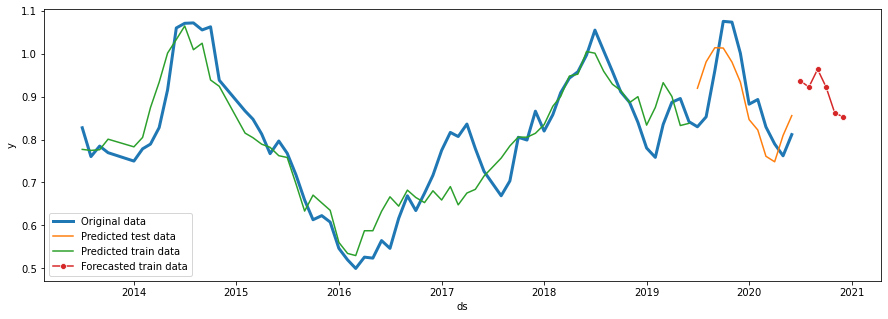

In [202]:
#@title Plotting the forecasted values against actual values
# Plotting the prophet model forecast
rcParams['figure.figsize'] = 15, 5
sns.lineplot(df_prophet_m['ds'],df_prophet_m['y'], label ='Original data',linewidth = 3)
sns.lineplot(forecast_prophet_m['ds'],forecast_prophet_m['yhat'], label ='Predicted test data')
sns.lineplot(forecast_prophet_train['ds'],forecast_prophet_train['yhat'], label ='Predicted train data')
sns.lineplot(final_df_forecast['ds'][-6:],final_df_forecast['y'][-6:], label ='Forecasted train data', marker='o')

In [201]:
#@title Calculate RMSE performance metrics for test data 
### Calculate RMSE performance metrics for test data 
forecast_prophet_m.reset_index(inplace=True)
test_prophet.reset_index(inplace=True)
mape = np.round(np.mean(np.abs(test_prophet['y']-forecast_prophet_m['yhat'])/test_prophet['y'])*100,2)
rmse = math.sqrt(mean_squared_error(test_prophet.y,forecast_prophet_m.yhat))


tempResults = pd.DataFrame({'Method':['Prophet'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Simple moving average forecast,0.100000,9.03
0,Holt Winters' additive method,0.100000,8.21
0,(SARIMA) Seasonal autoregressive integrated mo...,0.110000,11.18
0,(LSTM) Long short-term memory,0.037271,3.18
0,Prophet,0.071401,7.47


### <a name="concusion_id">**Concusion**</a>

The Given dataset contained 19 Columns and my aim was to predict the StainlessSteel Prices for the next 6 months.

 I tried 5 different method. Of all the models, LSTM gave the bestresult with least root mean squre error of 0.03 however was also the most compute intesive. 
 
 Prophet model inspite of being very quick gave comparable results(0.07 rmse) to the deep learning model. 
